In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


EDA


In [2]:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Define a function to calculate loan approval based on realistic rules
def approve_loan(row):
    if row['Credit_Score'] < 600:
        return 'No'
    if row['Credit_Score'] > 650 and row['DTI_Ratio'] < 36:
        return 'Yes'
    if row['DTI_Ratio'] > 45:
        return 'No'
    if row['Income'] < row['Loan_Amount'] * 2:
        return 'No'
    if row['Collateral'] == 'None' and row['Income'] < row['Loan_Amount'] * 3:
        return 'No'
    if row['Down_Payment'] == 0 and row['Loan_Amount'] > 20000:
        return 'No'
    if row['Employment_Years'] < 1:
        return 'No'
    return 'Yes'


In [4]:
import numpy as np

# Generate 150 instances for the dataset
np.random.seed(42)  # For reproducibility

# Randomly generate data for 300 clients based on realistic ranges
data = {
    'Client_ID': np.arange(1, 301),
    'Credit_Score': np.random.randint(500, 800, 300),  # Credit scores between 500 and 800
    'Income': np.random.randint(30000, 120000, 300),  # Income between 30k and 120k
    'DTI_Ratio': np.random.uniform(15, 50, 300).round(2),  # DTI ratios between 15% and 50%
    'Collateral': np.random.choice(['House', 'Car', 'None'], 300),  # Randomly choose collateral
    'Loan_Amount': np.random.randint(5000, 30000, 300),  # Loan amounts between 5k and 30k
    'Loan_Purpose': np.random.choice(['Car', 'Home Improvement', 'Medical', 'Business', 'Vacation'], 300),  # Loan purposes
    'Employment_Years': np.random.randint(1, 15, 300),  # Years of employment between 1 and 15
    'Loan_Term_Years': np.random.randint(2, 10, 300),  # Loan term between 2 and 10 years
    'Down_Payment': np.random.randint(0, 10000, 300),  # Down payment between 0 and 10k
    'Existing_Liabilities': np.random.choice(['Credit Card', 'Mortgage', 'Personal Loan', 'None'], 300),  # Existing liabilities
    'Citizenship': np.random.choice(['Yes', 'No'], 300, p=[0.95, 0.05]),  # 95% Yes, 5% No for citizenship
    'Loan_Approved': np.random.choice(['Yes', 'No'], 300, p=[0.7, 0.3])  # 70% approved, 30% rejected
}

# Convert to DataFrame


df_300 = pd.DataFrame(data)


In [5]:
df_300['Loan_Approved'] = df_300.apply(approve_loan, axis=1)

In [6]:
# drop id column because it is irrelevant

df = df_300.drop('Client_ID', axis=1)

In [7]:
df.head()

,Credit_Score,Income,DTI_Ratio,Collateral,Loan_Amount,Loan_Purpose,Employment_Years,Loan_Term_Years,Down_Payment,Existing_Liabilities,Citizenship,Loan_Approved
0,602,34014,49.23,None,29762,Medical,11,3,9074,Personal Loan,Yes,No
1,770,41093,34.46,House,16046,Vacation,5,2,6406,Credit Card,Yes,Yes
2,606,48070,26.29,None,22717,Home Improvement,5,8,8591,Personal Loan,Yes,No
3,571,65777,16.52,House,25534,Business,12,6,6907,Mortgage,No,No
4,688,86958,47.36,House,28150,Home Improvement,5,2,8800,Personal Loan,No,No


In [8]:
df.dtypes

,0
Credit_Score,int64
Income,int64
DTI_Ratio,float64
Collateral,object
Loan_Amount,int64
Loan_Purpose,object
Employment_Years,int64
Loan_Term_Years,int64
Down_Payment,int64
Existing_Liabilities,object


In [9]:
fig_loan_status=px.histogram(df,x='Loan_Approved',title='Loan Status Distribution')
fig_loan_status.show()

In [10]:
df.describe()

,Credit_Score,Income,DTI_Ratio,Loan_Amount,Employment_Years,Loan_Term_Years,Down_Payment
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,654.703333,76509.526667,32.656333,17786.246667,7.426667,5.436667,5158.420000
std,83.646025,26931.928381,9.930301,7427.772855,4.037196,2.235168,2947.072293
min,501.000000,30412.000000,15.090000,5060.000000,1.000000,2.000000,16.000000
25%,594.750000,53229.000000,24.257500,11951.000000,4.000000,3.000000,2441.250000
50%,659.000000,77119.500000,33.605000,17796.500000,7.000000,5.000000,5436.000000
75%,726.000000,99732.500000,40.845000,24122.250000,11.000000,7.000000,7712.250000
max,797.000000,119930.000000,49.920000,29951.000000,14.000000,9.000000,9956.000000


In [11]:
fig_applicant_income = px.histogram(df, x='Income',
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

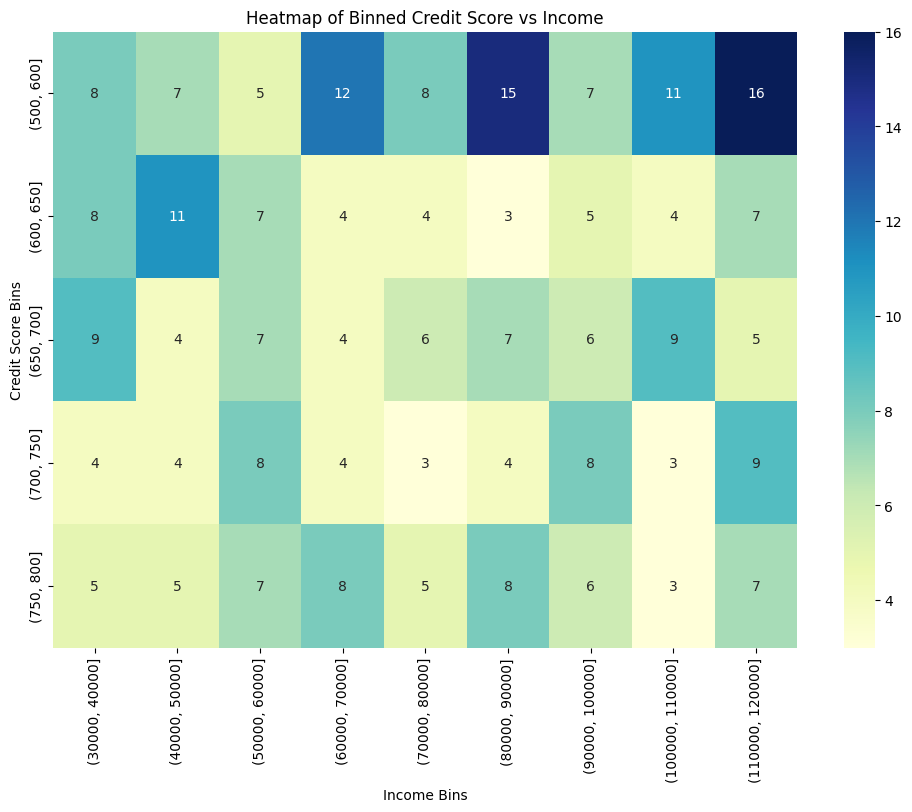

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for Credit Score and Income
credit_bins = pd.cut(df['Credit_Score'], bins=[500, 600, 650, 700, 750, 800])
income_bins = pd.cut(df['Income'], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000])

# Create a pivot table to aggregate the binned data
heatmap_data = df.groupby([credit_bins, income_bins]).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')

# Add titles and labels
plt.title('Heatmap of Binned Credit Score vs Income')
plt.xlabel('Income Bins')
plt.ylabel('Credit Score Bins')
plt.show()


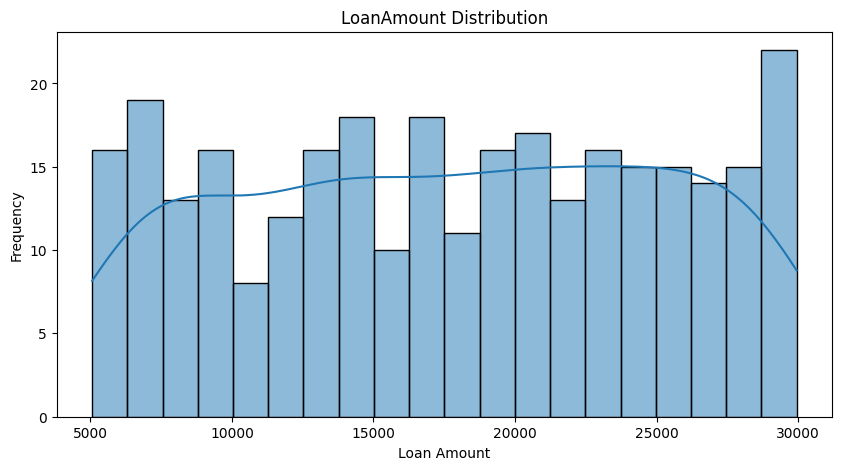

In [13]:
df['Loan_Amount'] = pd.to_numeric(df['Loan_Amount'], errors='coerce')
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Loan_Amount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()

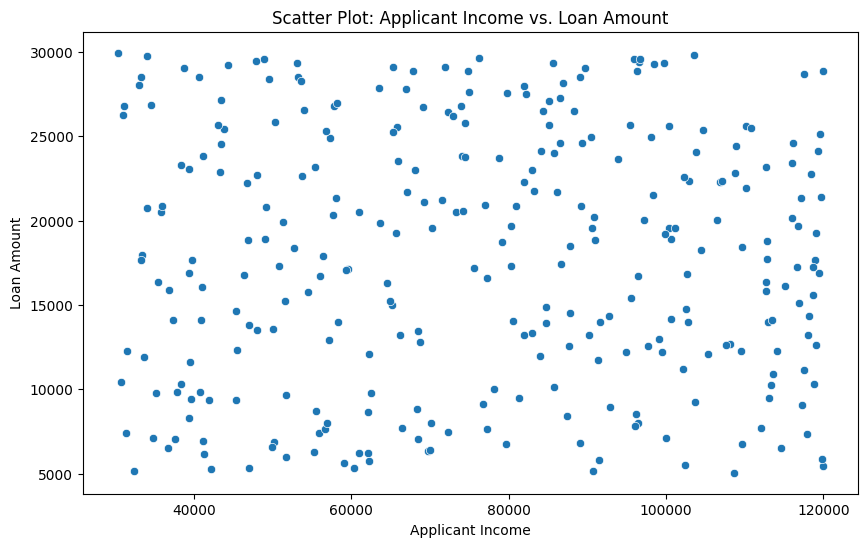

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Loan_Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()

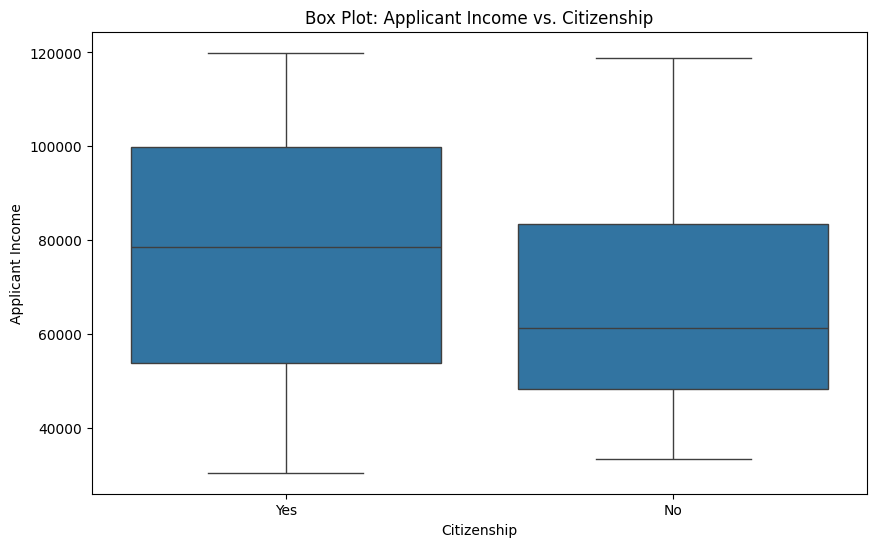

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Citizenship', y='Income')
plt.ylabel('Applicant Income')
plt.xlabel('Citizenship')
plt.title('Box Plot: Applicant Income vs. Citizenship')
plt.show()

In [16]:
fig_income = px.box(df, x='Loan_Approved',
                    y='Income',
                    color="Loan_Approved",
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

Detecting outliers and removing them

since thes datasets are generated using ground rules and randomisation thee chances of them having outliers is very low

In [17]:
#Now let’s have a look at the relationship between credit history and loan status:


fig_credit_history = px.histogram(df, x='Credit_Score', color='Loan_Approved',

                                  barmode='group',

                                  title='Loan_Status vs Credit_Score')

fig_credit_history.show()

DATA PREPARATION

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns at once
categorical_columns = ['Collateral', 'Loan_Purpose', 'Existing_Liabilities']
encoded_columns = ohe.fit_transform(df[categorical_columns])

# Create a DataFrame from the encoded arrays
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame with the new encoded DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Instantiate and apply LabelEncoder for binary features
label_encoder_citizenship = LabelEncoder()
df_encoded['Citizenship'] = label_encoder_citizenship.fit_transform(df_encoded['Citizenship'])

label_encoder_loan_approved = LabelEncoder()
df_encoded['Loan_Approved'] = label_encoder_loan_approved.fit_transform(df_encoded['Loan_Approved'])

# Display the final encoded DataFrame
print(df_encoded)


     Credit_Score  Income  DTI_Ratio  Loan_Amount  Employment_Years  \
0             602   34014      49.23        29762                11   
1             770   41093      34.46        16046                 5   
2             606   48070      26.29        22717                 5   
3             571   65777      16.52        25534                12   
4             688   86958      47.36        28150                 5   
..            ...     ...        ...          ...               ...   
295           557   53960      39.99        26534                 2   
296           673   63591      32.29        19870                 5   
297           779  112848      41.41        17713                 1   
298           613   97641      18.60        12561                 3   
299           787   66395      33.78         7719                12   

     Loan_Term_Years  Down_Payment  Citizenship  Loan_Approved  \
0                  3          9074            1              0   
1              

In [19]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Credit_Score', 'Income', 'DTI_Ratio', 'Loan_Amount',
                     'Employment_Years', 'Loan_Term_Years', 'Down_Payment']

# Standardize
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


# Display the updated DataFrame
print(df_encoded)


     Credit_Score    Income  DTI_Ratio  Loan_Amount  Employment_Years  \
0       -0.631129 -1.580523   1.671788     1.614988          0.886582   
1        1.380691 -1.317236   0.181936    -0.234681         -0.602082   
2       -0.583228 -1.057742  -0.642173     0.664936         -0.602082   
3       -1.002357 -0.399172  -1.627674     1.044822          1.134692   
4        0.398731  0.388607   1.483161     1.397602         -0.602082   
..            ...       ...        ...          ...               ...   
295     -1.170009 -0.838678   0.739748     1.179677         -1.346413   
296      0.219105 -0.480475  -0.036952     0.281004         -0.602082   
297      1.488467  1.351526   0.882984    -0.009878         -1.594524   
298     -0.499402  0.785936  -1.417864    -0.704650         -1.098303   
299      1.584268 -0.376186   0.113344    -1.357617          1.134692   

     Loan_Term_Years  Down_Payment  Citizenship  Loan_Approved  \
0          -1.091971      1.330854            1          

In [20]:
# Split the dataset into features (X) and target (y)
X = df_encoded.drop('Loan_Approved', axis=1)
y = df_encoded['Loan_Approved']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")


Logistic Regression:
Accuracy: 0.7555555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        41
           1       0.79      0.76      0.77        49

    accuracy                           0.76        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.76      0.76      0.76        90

Confusion Matrix:
 [[31 10]
 [12 37]]




True Positives (TP): The number of positive instances
correctly predicted as positive. In this case, it is 37 (bottom-right cell).

True Negatives (TN): The number of negative instances correctly predicted as negative. Here, it is 31 (top-left cell).

False Positives (FP): The number of negative instances incorrectly predicted as positive. This is 10 (top-right cell).

False Negatives (FN): The number of positive instances incorrectly predicted as negative. This is 12 (bottom-left cell).

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")


Random Forest Classifier:
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.94      0.98      0.96        49

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion Matrix:
 [[38  3]
 [ 1 48]]




In [23]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)


SVC:
Accuracy:  0.8666666666666667

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.86      0.90      0.88        49

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90


Confusion Matrix: 
 [[34  7]
 [ 5 44]]


In [24]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_rep_xgb)
print("Confusion Matrix:\n", confusion_mat_xgb)



XGBoost Classifier:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.94      0.96      0.95        49

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

Confusion Matrix:
 [[38  3]
 [ 2 47]]


In [25]:
# Create a DataFrame to show the original data, actual and predicted values
results_df = X_test.copy()  # Start with the test features
results_df['Actual'] = y_test.values  # Add the actual values
results_df['Predicted'] = y_pred_xgb  # Add the predicted values

# # Optionally, convert the numeric predictions back to categorical for easier interpretation
# results_df['Actual'] = results_df['Actual'].map({1: 'Yes', 0: 'No'})
# results_df['Predicted'] = results_df['Predicted'].map({1: 'Yes', 0: 'No'})

# Display the results
print("\nClient Predictions vs Actual Values:\n", results_df)


Client Predictions vs Actual Values:
      Credit_Score    Income  DTI_Ratio  Loan_Amount  Employment_Years  \
203     -0.331751 -1.105758  -1.716440     0.596295          0.886582   
266     -0.104223 -1.680571   0.629800    -1.401175          0.638471   
152      0.937612 -1.160580   1.481143    -1.136185          0.390361   
9       -0.810755 -0.697680  -1.193933     1.214469          0.142250   
233     -0.619153 -1.382137   0.155710    -0.123156          0.886582   
..            ...       ...        ...          ...               ...   
114     -1.241859  1.230910   0.265658     0.083981          1.382803   
118      0.973537 -0.863634   0.283815     1.446150          0.390361   
72       0.015528  0.203834   1.319751     1.376430          1.382803   
15       1.656119  0.166752   0.821453     0.413162         -0.850192   
10      -0.667054  1.173782  -1.015392    -0.683882          1.134692   

     Loan_Term_Years  Down_Payment  Citizenship  Collateral_House  \
203         1.1

In [26]:
# Create a DataFrame to show the original data alongside predictions
# Store the original DataFrame for later use
original_df = df.copy()
# Find the indices of the test set in the original DataFrame
test_indices = X_test.index

# Add actual and predicted values to the original DataFrame
original_df['Actual'] = np.nan  # Initialize column for actual values
original_df['Predicted'] = np.nan  # Initialize column for predicted values

# Assign actual and predicted values to the corresponding rows
original_df.loc[test_indices, 'Actual'] = y_test.values  # Add actual values
original_df.loc[test_indices, 'Predicted'] = y_pred_xgb  # Add predicted values

# Convert numeric predictions back to categorical for better readability
original_df['Actual'] = original_df['Actual'].map({1: 'Yes', 0: 'No'})
original_df['Predicted'] = original_df['Predicted'].map({1: 'Yes', 0: 'No'})
# Filter to show only rows with actual values (non-NaN)
filtered_df = original_df.dropna(subset=['Actual'])
# Display the original DataFrame with predictions
print("\nOriginal DataFrame with Predictions:\n", filtered_df.head(10))


Original DataFrame with Predictions:
     Credit_Score  Income  DTI_Ratio Collateral  Loan_Amount      Loan_Purpose  \
5            520  112074      47.17      House         7711          Vacation   
6            602   40729      23.85       None         9853          Vacation   
7            621   75017      39.34      House        27596          Business   
9            587   57751      20.82       None        26792          Vacation   
10           599  108069      22.59       None        12715           Medical   
15           793   80993      40.80       None        20850          Business   
17           776   40647      48.55       None        28485           Medical   
19           521  118891      28.81        Car        17652  Home Improvement   
22           548  100316      20.94       None        19536          Business   
24           669  107575      28.59        Car        12617          Vacation   

    Employment_Years  Loan_Term_Years  Down_Payment Existing_Liabilit

In [27]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
print("\nPredictions vs Actual Values:\n", predictions_df)


Predictions vs Actual Values:
      Actual  Predicted
203       1          1
266       1          1
152       0          0
9         0          0
233       1          1
..      ...        ...
114       0          0
118       1          1
72        0          0
15        1          1
10        0          0

[90 rows x 2 columns]


UNSUPERVISED LEARNING:

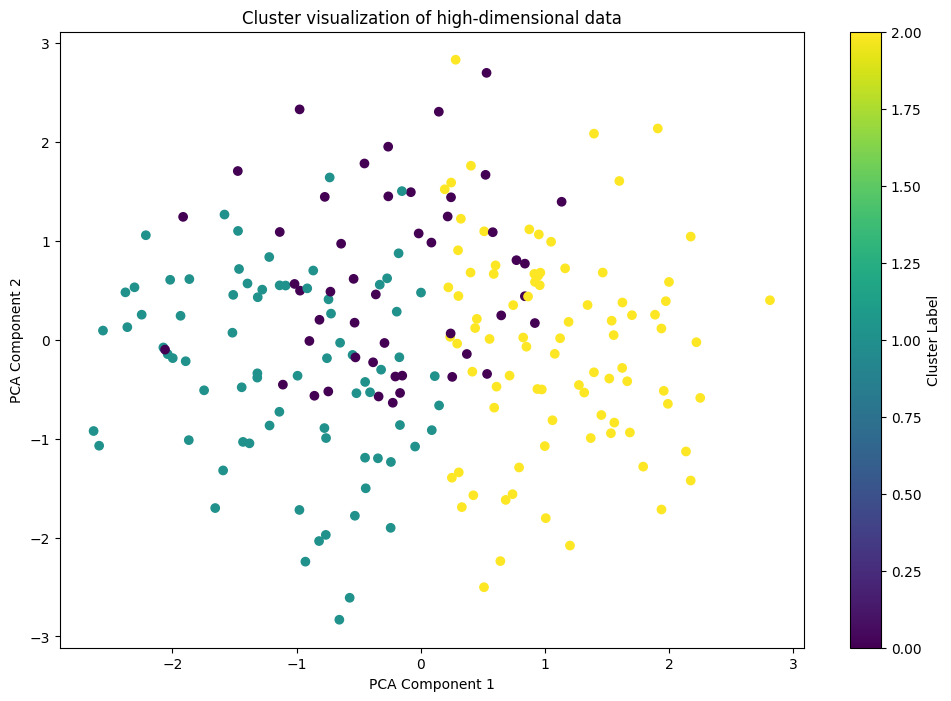

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Initialize the KMeans object and fit it to the data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_train)

# Reduce the dimensionality of the data for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Plot the reduced data with the cluster labels
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Cluster visualization of high-dimensional data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [29]:
df['Loan_Purpose'].unique()

array(['Medical', 'Vacation', 'Home Improvement', 'Business', 'Car'],
      dtype=object)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# Split the dataset into features (X) and target (y)
X1 = df.drop('Loan_Approved', axis=1)
y1 = df['Loan_Approved']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y1_encoded = label_encoder.fit_transform(y1)


xgb_model1 = XGBClassifier(random_state=42)
# Example preprocessing pipeline
numeric_features = ['Credit_Score', 'Income', 'DTI_Ratio', 'Loan_Amount', 'Employment_Years', 'Loan_Term_Years', 'Down_Payment']
categorical_features = ['Collateral', 'Loan_Purpose', 'Existing_Liabilities', 'Citizenship']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1_encoded, test_size=0.3, random_state=42)

# Create a pipeline including preprocessing and model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model1)])

# Fit the pipeline on the training data
model_pipeline.fit(X_train1, y_train1)

# Save the pipeline
joblib.dump(model_pipeline, 'model_pipeline.pkl')


['model_pipeline.pkl']

In [34]:
!ls

drive  model_pipeline.pkl  sample_data


In [35]:
from google.colab import files

# Download the model_pipeline.pkl file
files.download('model_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:

# Predict on the test set
y_pred = model_pipeline.predict(X_test1)

# Evaluate the model (accuracy, classification report, confusion matrix, etc.)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test1, y_pred)
classification_rep = classification_report(y_test1, y_pred)
confusion_mat = confusion_matrix(y_test1, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.94      0.96      0.95        49

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

Confusion Matrix:
 [[38  3]
 [ 2 47]]


In [32]:
data_test = {
    'Credit_Score': [602],
    'Income': [34014],
    'DTI_Ratio': [49.23],
    'Collateral': ['None'],
    'Loan_Amount': [29762],
    'Loan_Purpose': ['Shopping'],
    'Employment_Years': [11],
    'Loan_Term_Years': [3],
    'Down_Payment': [9074],
    'Existing_Liabilities': ['Medical debt'],
    'Citizenship': ['Yes'],
    'Loan_Approved': ['No']
}

In [33]:
# Create DataFrame for the unseen data
unseen_df = pd.DataFrame(data_test)

# Use the trained pipeline to make predictions
predictions = model_pipeline.predict(unseen_df)

# If you want to decode the predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Print the results
unseen_df['Predicted_Loan_Approved'] = predicted_labels
print(unseen_df)

   Credit_Score  Income  DTI_Ratio Collateral  Loan_Amount Loan_Purpose  \
0           602   34014      49.23       None        29762     Shopping   

   Employment_Years  Loan_Term_Years  Down_Payment Existing_Liabilities  \
0                11                3          9074         Medical debt   

  Citizenship Loan_Approved Predicted_Loan_Approved  
0         Yes            No                      No  
